# Final Project | TTK4255

In [83]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from os.path import join, basename, realpath, dirname, exists, splitext

## Task 1

### 1.2

[[2.35940946e+03 0.00000000e+00 1.37005852e+03]
 [0.00000000e+00 2.35961091e+03 1.05963818e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


Text(0.5, 0, 'Undistortion uncertainty')

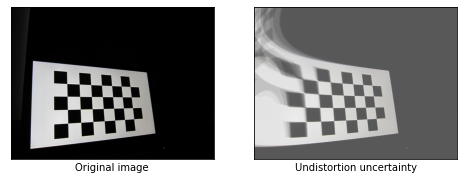

In [85]:
# Task 1.2
"""A more visual understanding can be gotten by generating a few (e.g. ten) hypothetical outcomes from the
distribution defined by the standard deviations, and undistorting an image with each set of hypothetical
parameters. The resulting images can then be compared, to get a visual impression of the uncertainty."""

# Load data from calibration
folder      = 'C:\\Users\\sindr\\Documents\\UniversiTales\\V22\\RobVis\\TTK4255-Robotic-Vision\\Final Project\\python\\data_hw5_ext\\calibration'
dc          = np.loadtxt(join(folder, 'dc.txt'))
std_int     = np.loadtxt(join(folder, 'std_int.txt'))
K           = np.loadtxt(join(folder,'K.txt'))
fx,fy,cx,cy,k1d,k2d,p1d,p2d,k3d,k4d,k5d,k6d,s1,s2,s3,s4,taux,tauy = std_int
k1,k2,k3,p1,p2 = dc

# Load image
im_name     = 'image042.jpg'
location    = 'C:\\Users\\sindr\\Documents\\UniversiTales\\V22\\RobVis\\TTK4255-Robotic-Vision\\Final Project\\python\\data_hw5_ext\\calibration'
image      = mpimg.imread(join(location, im_name))

# Generate distortion coefficients
num_dists = 10
num_coefs = 5
dists = []
for i in range(num_dists):
    coefs = []
    for j in range(num_coefs):
        coefs.append(np.random.normal(dc[j], std_int[4:4+num_coefs][j]))
    dists.append(coefs)
    
# Undistort
scaledNewMatrix = K
#scaledNewMatrix[:2,-1] *= 2
undis_images = []
for i in range(num_dists):
    undis_images.append(cv2.undistort(image,K,np.asarray(dists[i]),scaledNewMatrix))

# Plot images
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.xlabel('Original image')

plt.subplot(122)
#plt.imshow(image, alpha=0.7)
for k in range(num_dists):
    plt.imshow(undis_images[k], alpha=min(1/num_dists,0.5))
plt.xticks([])
plt.yticks([])
plt.xlabel('Undistortion uncertainty')


a) When the purpose is to build intuition for the uncertainty in distortion parameters, using the calibration images is not necessary. After all, performing *undistort()* with 'incorrect' coefficients is equivical to performing distortion - the variant strength of which represents the uncertainty. 

b)

c) The effects of undistortion is hardly noticable. Amplifying the standard deviation by a factor of 100 confirms that there is indeed *some* effects, and that the majority of this is near the corners of the image. This is intuitive, as its further from the 'center' of radial distortion, and the conclusion from 1.1b.

## Task 2

### 2.2

Bundle adjusment refers to a general method of reconstruction problems, and can in this context be used to refine an existing, suboptimal estimation of camera motion and 3D structure. It works by solving a minimization problem with the square reprojection error. The parameters are the 3D coordinates for the <...> points and the camera parameters (rotation, translation and intrinsics). The objective function is 
$$E=\sum_{i=1}^m ||P_i \widetilde{\underline{\textbf{x}}} - \widetilde{\underline{\textbf{x}}}'||$$


If using the "Sparse BA" formulation, minimizing with Levenberg-Marquardt, one can leverage the sparsity of the Jacobian to increase computational efficiency. The Jacobian contains an substructure relating to each camera angle (motion) and each measurement point (3D coordinate). If there are for instance 3 cameras and 4 points, the Jacobian's structure would be as such:

<img src=".\Markdown_images\SBA.png" width="260">
